In [1]:
import numpy as np

In [45]:
path = "/home/andrea/Desktop/Baseline3Prime/3.2/Set/"

In [30]:
files = []
lines = []
allWorkerTimes = [[[] for i in range(13)] for j in range(4)]
allProcessingTimes = [[[] for i in range(13)] for j in range(4)]
allServiceTimes = [[[] for i in range(13)] for j in range(4)]
allWaitingTimes = [[[] for i in range(13)] for j in range(4)]
allResponseTimes = [[[] for i in range(13)] for j in range(4)]
allTotalTimes = [[[] for i in range(13)] for j in range(4)]
for rep in range(1, 4):
    print(rep)
    for mw in [4, 5]:
        clients = 0
        for cli in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]:
            print(cli)
            work= 0
            for workers in [8,16,32, 64]:

                file = open(path+"MW"+str(mw)+"/rep"+str(rep)+"/Get_C"+str(cli)+"_T1_W"+str(workers)+"_R"+str(rep)+"/times.log")

                ind = 0
                for line in file:
                    if ind != 0 and len(line.split("\t")) > 6:
                        splitted = line.split("\t")
                        allWaitingTimes[work][clients].append(int(splitted[2]))
                        #allWorkerTimes[work][clients].append(int(splitted[3]))
                        allProcessingTimes[work][clients].append(int(splitted[4]))
                        #allServiceTimes[work][clients].append(int(splitted[5]))
                        #allResponseTimes[work][clients].append(int(splitted[6]))
                        #allTotalTimes[work][clients].append(int(splitted[-1]))
                    ind += 1
                work += 1
            clients += 1

1
1
4
8
12
16
20
24
28
32
45
60
85
1
4
8
12
16
20
24
28
32
45
60
85
2
1
4
8
12
16
20
24
28
32
45
60
85
1
4
8
12
16
20
24
28
32
45
60
85
3
1
4
8
12
16
20
24
28
32
45
60
85
1
4
8
12
16
20
24
28
32
45
60
85


In [31]:
meanResp = np.zeros((4, 13))
meanWait = np.zeros((4,13))
meanProc =np.zeros((4, 13))
meanWorker = np.zeros((4, 13))
meanServ = np.zeros((4, 13))
meanTot = np.zeros((4, 13))
for i in range(0, 4):
    for j in range(0, 13):
        meanProc[i][j] = np.mean(allProcessingTimes[i][j])
        meanWait[i][j] = np.mean(allWaitingTimes[i][j])
        #meanResp[i][j] = np.mean(allResponseTimes[i][j])
        #meanServ[i][j] = np.mean(allServiceTimes[i][j])
        #meanTot[i][j] = np.mean(allTotalTimes[i][j])

        #meanWorker[i][j] = np.mean(allWorkerTimes[i][j])

In [34]:
fileOutput = open(path+"ProcessingTimes.txt", "w")

In [35]:
clients = [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]
for j in range(0, len(clients)):
    clients[j] = clients[j] *2

fileOutput.write("Mean Processing Time")
for j in range(len(meanWait)):
    fileOutput.write("\n\nWorker: " + str(2**(3+j)) + "\n")
    for h in range(0, len(meanWait[0])):         
        fileOutput.write("\n"+str(clients[h])+" Clients: ")
        fileOutput.write(str(meanProc[j][h]/1000000))
fileOutput.close()

In [57]:
#Qui provavo a calcolare lambda per vedere utilization
files = []
lines = []
workers = 8
allArrivals = [[[] for i in range(13)] for j in range(4)]
for rep in range(1, 4):
    print(rep)
    for mw in [4, 5]:
        clients = 0
        for cli in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]:
            print(cli)
            work= 0
            for workers in [8,16,32, 64]:
                file = open(path+"MW"+str(mw)+"/rep"+str(rep)+"/Get_C"+str(cli)+"_T1_W"+str(workers)+"_R"+str(rep)+"/interArrivalTime.log")
                ind = 0
                for line in file:
                    if ind != 0 and line != "null\n":
                        allArrivals[work][clients].append(float(line[:-1]))
                    ind += 1
                work += 1
            clients += 1

1
1
4
8
12
16
20
24
28
32
45
60
85
110
1
4
8
12
16
20
24
28
32
45
60
85
110
2
1
4
8
12
16
20
24
28
32
45
60
85
110
1
4
8
12
16
20
24
28
32
45
60
85
110
3
1
4
8
12
16
20
24
28
32
45


ValueError: could not convert string to float: 

In [58]:
meanInterArrivals = np.zeros((4, 13))
for i in range(0, 4):
    for j in range(0, 13):
        meanInterArrivals[i][j] = np.mean(allArrivals[i][j])

In [59]:
fileOutput = open(path+"/InterarrivalsTimes.txt", "w")

In [60]:
clients = [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]
for j in range(0, len(clients)):
    clients[j] = clients[j] *2

fileOutput.write("Mean Interarrival Time")
for j in range(len(meanResp)):
    fileOutput.write("\n\nWorker: " + str(2**(3+j)) + "\n")
    for h in range(0, len(meanResp[0])):         
        fileOutput.write("\n"+str(clients[h])+" Clients: ")
        fileOutput.write(str(meanInterArrivals[j][h]/1000000))
fileOutput.close()

In [8]:
import matplotlib.pyplot as plt

In [13]:
clients = [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]
for j in range(0, len(clients)):
    clients[j] = clients[j] *2
plt.figure(figsize=(27, 20))
ind = 0
clients4 = [28, 32, 40]
for i in range(0, len(clients4)):
    clients4[i] = 6* clients4[i]
#plt.plot(clients, worker[3]/1000000, linewidth=3, markersize = 10, color="b", label = "worker")
#plt.plot(clients, meanResp1[ind]/1000000, linewidth=3, markersize = 10, color="g", label = "response 3.1")
#plt.plot(clients, meanServ1[ind]/1000000, linewidth=3, markersize = 10, color="C1", label = "service 3.1")
plt.plot(clients, meanResp[ind]/1000000, linewidth=3, markersize = 10, color="b", label = "Response Time")
plt.plot(clients, meanServ[ind]/1000000, linewidth=3, markersize = 10, color="r", label = "Service Time")
plt.plot(clients, meanWait[ind]/1000000, linewidth=3, markersize = 10, color="g", label = "Waiting Time")
#plt.plot(clients, meanServ[1]/1000000, linewidth=3, markersize = 10, color="r", label = "16 service time")
#plt.plot(clients, meanServ[2]/1000000, linewidth=3, markersize = 10, color="g", label = "32 service time")
#plt.plot(clients, meanServ[3]/1000000, linewidth=3, markersize = 10, color="C1", label = "64 service time")


plt.legend(loc=2, fontsize=35)
plt.title("64 Worker threads - Service, Waiting and Response Time over number of clients", fontsize= 40)
plt.xlabel("Number of Clients", fontsize= 35)
plt.ylabel("Time [msec]", fontsize= 35)
plt.rc('grid', linestyle="-.", color ='grey')
plt.grid(True)
plt.xticks(clients)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#plt.margins(x = 0.05, y = 0.05)

#plt.plot(clients, meanResp[1], linewidth=3, markersize = 10, color="r", label = "16 worker threads")
#plt.plot(clients, meanResp[2], linewidth=3, markersize = 10, color="g", label = "32 worker threads")
#plt.plot(clients, meanResp[3], linewidth=3, markersize = 10, color="C1", label = "64 worker threads")


(array([ -2.,   0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.]),
 <a list of 11 Text yticklabel objects>)

In [15]:
plt.savefig(path+"times64WorkerThreads.png")

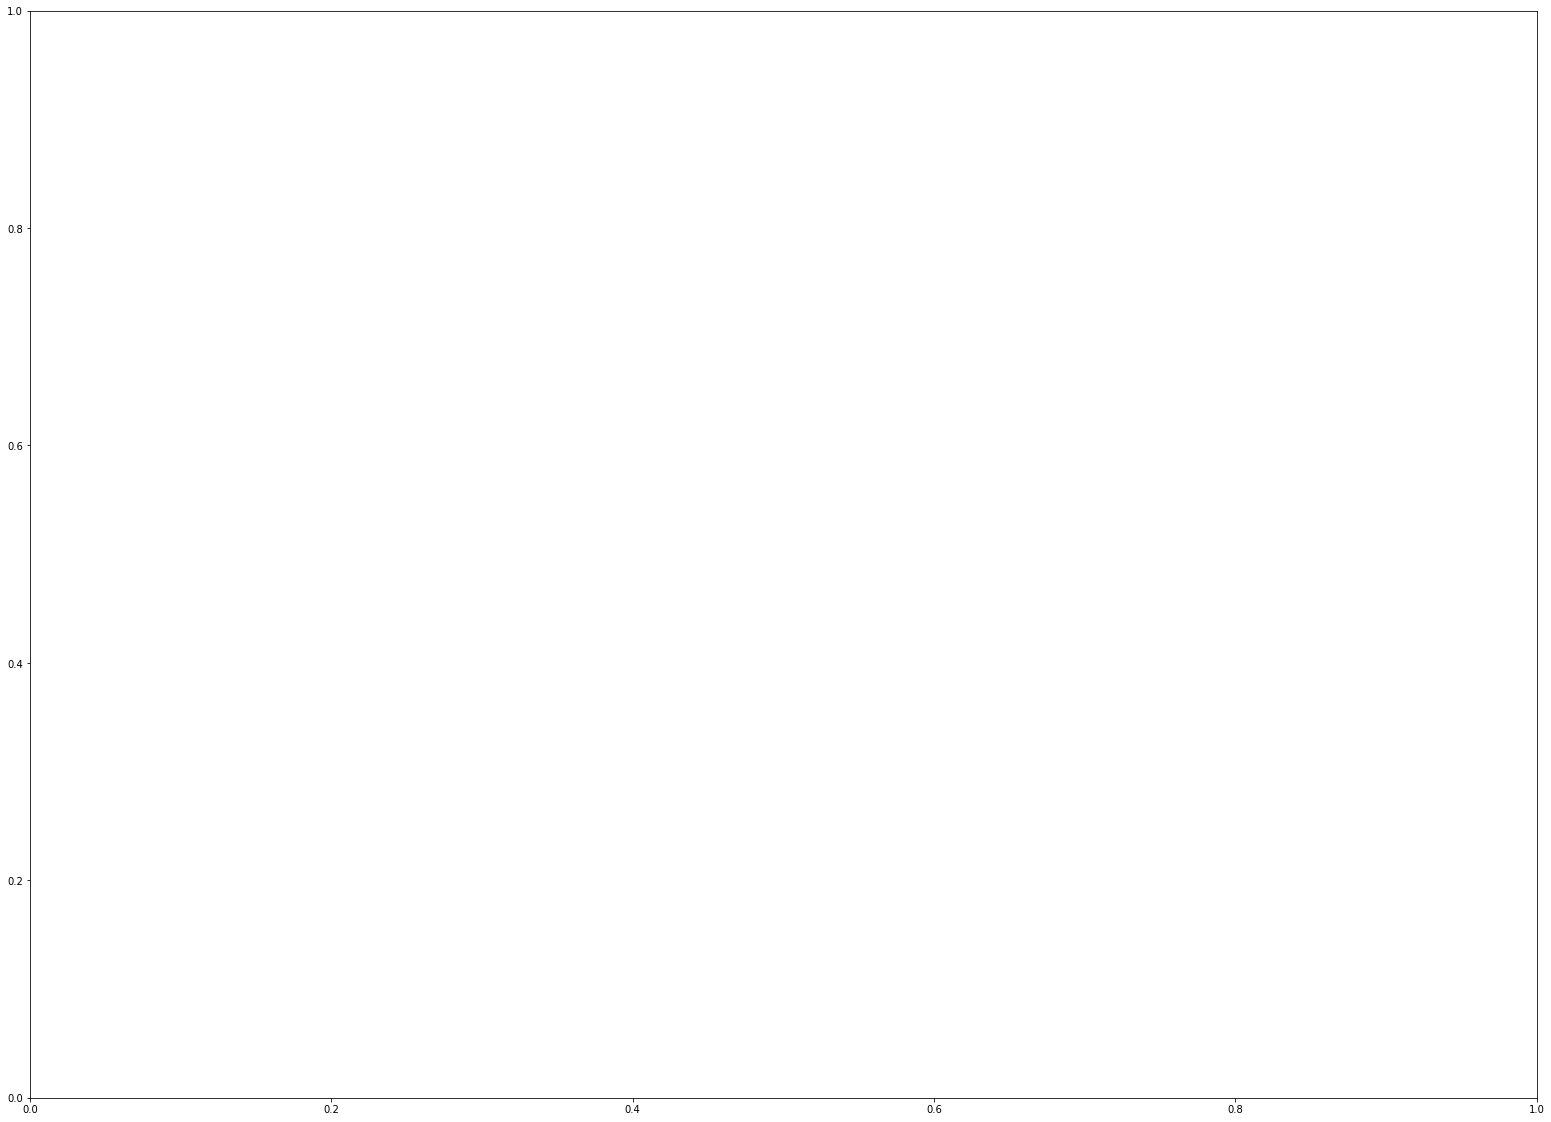

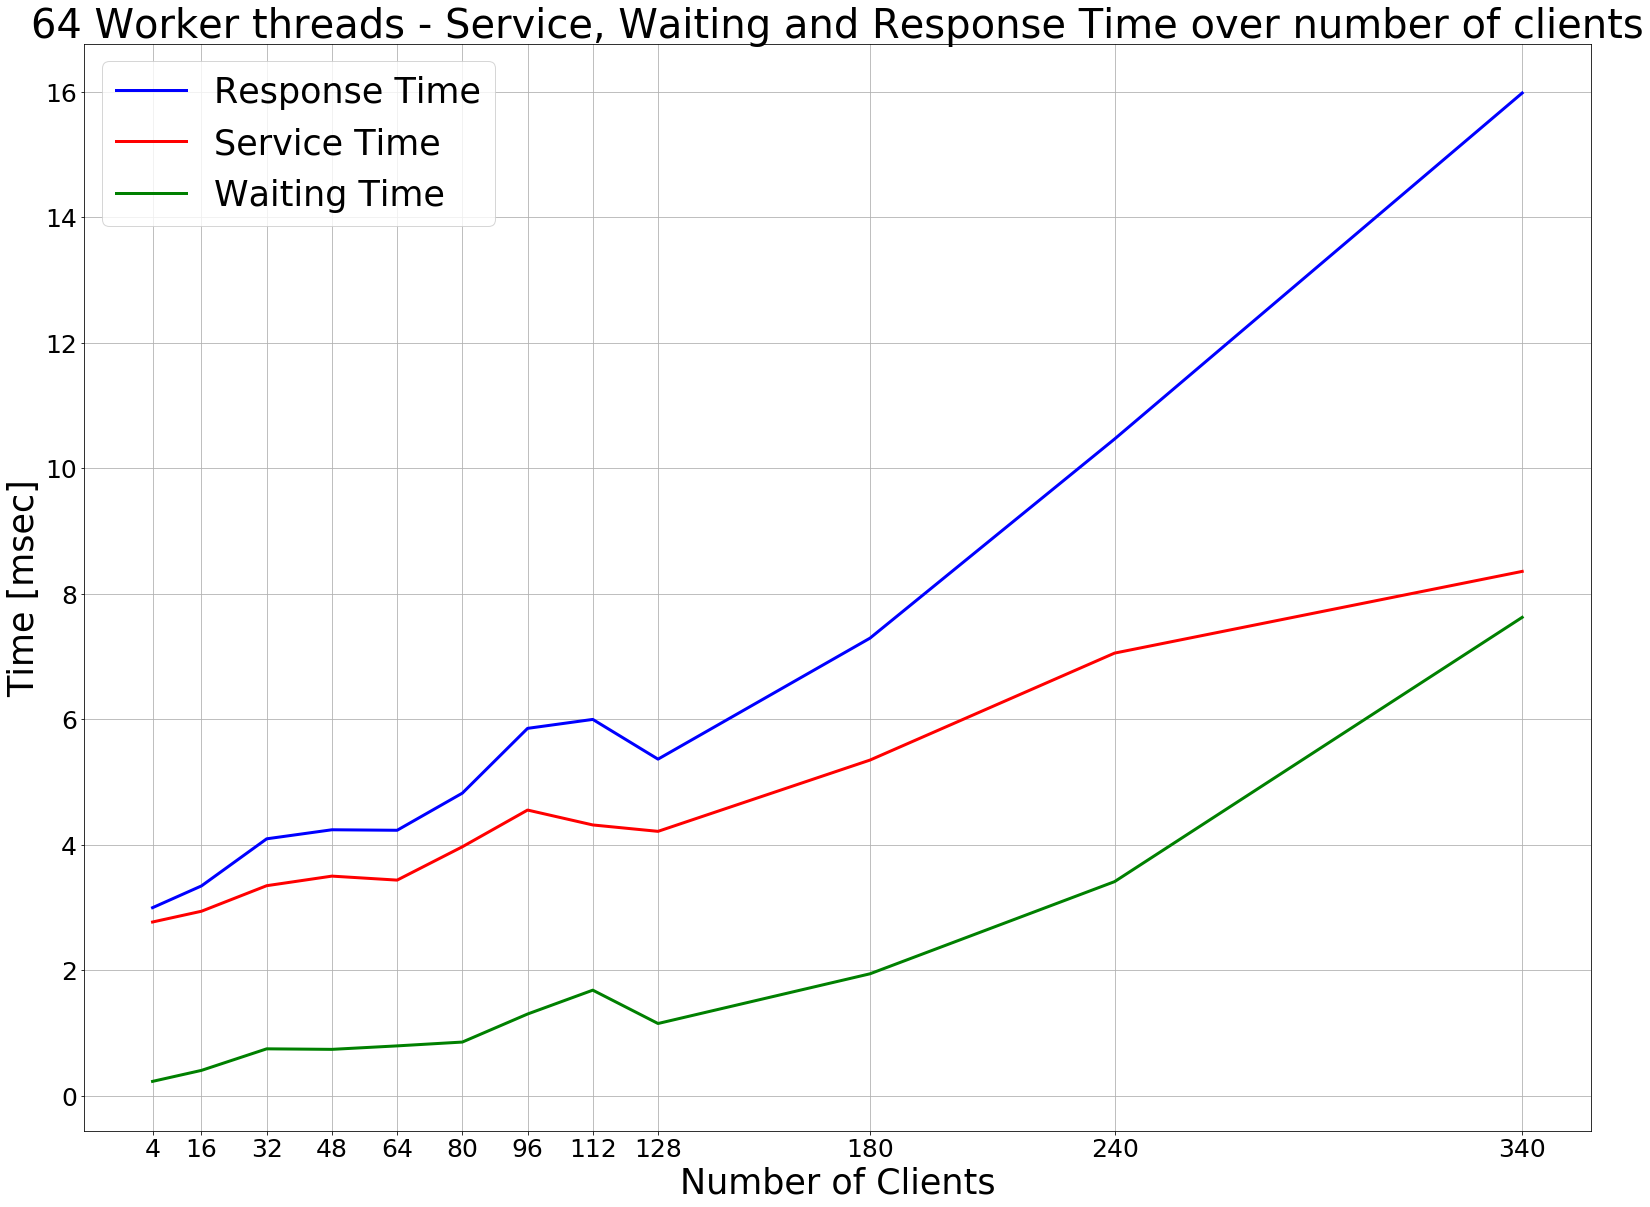

In [12]:
plt.show()

In [38]:
import matplotlib.pyplot as plt

In [52]:
#guardo alle lunghezze delle code per ogni configurazione di clients e worker threads
files = []
work = 0
allQueueLengths = np.zeros((4, 13))
for worker in [8, 16, 32, 64]:
    for mw in [4, 5]:
        clients = 0
        for cli in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]:
            queueRep = np.zeros(3)
            for rep in range(1, 4):
                file = open(path+"MW"+str(mw)+"/rep"+str(rep)+"/Get_C"+str(cli)+"_T1_W"+str(worker)+"_R"+str(rep)+"/QueueLength.log")
                ind = 0
                lines = []
                for line in file:
                    lines.append(line)
                j = 0
                while lines[j] == "0\n":
                    j += 1
                j = j
                p = len(lines)-1
                while lines[p] == "0\n":
                    p -= 1
                p = (len(lines)-p)
                if p == 0:
                    p = 1
                x = np.asarray(lines[j:-p])
                x = x.astype(int)
                queueRep[rep-1] = np.mean(x)
            allQueueLengths[work][clients] += np.mean(queueRep)

            clients += 1

    work += 1

In [62]:
fileOutput = open(path+"/QueueLengths.txt", "w")

In [63]:
clients = [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]
for j in range(0, len(clients)):
    clients[j] = clients[j] *2

fileOutput.write("Mean Queue Length")
for j in range(len(allQueueLengths)):
    fileOutput.write("\n\nWorker: " + str(2**(3+j)) + "\n")
    for h in range(0, len(allQueueLengths[0])):         
        fileOutput.write("\n"+str(clients[h])+" Clients: ")
        fileOutput.write(str(allQueueLengths[j][h]))
fileOutput.close()

In [19]:
pendenze = np.zeros(4)
for j in range(0, len(allQueueLengths)):
    pendenze[j] = (allQueueLengths[j][-1] - allQueueLengths[j][-2])
print(pendenze)

[ 46.11510647  36.0690333   26.3921605   13.02595872]


In [59]:
#plotto la lunghezza delle code
plt.figure(figsize=(40, 30))
clients = [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]

plt.plot(clients, allQueueLengths[0], linewidth=3, markersize = 10, color="r", label = "8 worker threads")
plt.plot(clients, allQueueLengths[1], linewidth=3, markersize = 10, color="C1", label = "16 worker threads")
plt.plot(clients, allQueueLengths[2], linewidth=3, markersize = 10, color="g", label = "32 worker threads")
plt.plot(clients, allQueueLengths[3], linewidth=3, markersize = 10, color="b", label = "64 worker threads")
plt.legend(loc=2, fontsize=35)

plt.title('Queue Length', fontsize= 40)
plt.xlabel("Number of Clients", fontsize= 35)
plt.ylabel("Avg. number of jobs in the queue", fontsize= 35)
plt.grid(True)
plt.xticks(clients)
plt.rc('grid', linestyle="-.", color ='grey')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)

In [60]:
plt.savefig(path+"queueLengths.png")

In [ ]:
plt.show()

In [36]:
#guardo alle lunghezze delle code per ogni configurazione di clients e worker threads
files = []
work = 0
allArrivals = np.zeros((2, 4, 13))
for worker in [8, 16, 32, 64]:
    for mw in [4, 5]:
        clients = 0
        for cli in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]:
            arrivalsRep = np.zeros(3)
            for rep in range(1, 4):
                file = open(path+"MW"+str(mw)+"/rep"+str(rep)+"/Get_C"+str(cli)+"_T1_W"+str(worker)+"_R"+str(rep)+"/interArrivalTime.log")
                ind = 0
                lines = []
                for line in file:
                    if line != "null\n":
                        lines.append(line)
                
                x = np.asarray(lines[10:-10])
                x = x.astype(int)
                arrivalsRep[rep-1] = np.mean(x)
            allArrivals[mw-4][work][clients] += np.mean(arrivalsRep)

            clients += 1

    work += 1

In [37]:
meanArrivals = np.zeros((2, 4, 13))
for mw in [4, 5]:
    for i in range(0, 4):
        for j in range(0, 13):
            meanArrivals[mw-4][i][j] = 1000000000/np.mean(allArrivals[mw-4][i][j])

In [38]:
finalArrivals = np.zeros((4, 13))
for i in range(0, 4):
        for j in range(0, 13):
            finalArrivals[i][j] = meanArrivals[0][i][j] + meanArrivals[1][i][j]

In [39]:
plt.figure(figsize=(40, 30))
clients = [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]

plt.plot(clients, finalArrivals[0], linewidth=3, markersize = 10, color="r", label = "8 worker threads")
plt.plot(clients, finalArrivals[1], linewidth=3, markersize = 10, color="C1", label = "16 worker threads")
plt.plot(clients, finalArrivals[2], linewidth=3, markersize = 10, color="g", label = "32 worker threads")
plt.plot(clients, finalArrivals[3], linewidth=3, markersize = 10, color="b", label = "64 worker threads")
plt.legend(loc=2, fontsize=35)

plt.title('Queue Length', fontsize= 40)
plt.xlabel("Number of Clients", fontsize= 35)
plt.ylabel("Avg. number of jobs in the queue", fontsize= 35)
plt.grid(True)
plt.xticks(clients)
plt.rc('grid', linestyle="-.", color ='grey')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)

In [ ]:
plt.show()